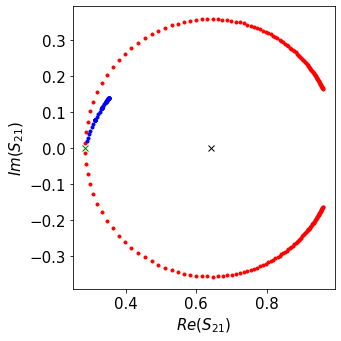

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import datacalc
plt.rcParams.update({'font.size': 15})

k = datacalc.init_KID('LT165',2,85,250,Teffmethod='GR')
k.plot_resp(6.528e-4*2*np.pi*3e8/(402*1e-3),plot='S21')

plt.tight_layout()
datafld = 'C:\\Users\\Steven\\Google Drive\\AP\\Thesis\\Report\\figures\\'
plt.savefig(datafld+'SPR_S21circle.pdf')